<a href="https://colab.research.google.com/github/siquette/IAD-003-2025-1/blob/main/IAD_001_Y2025_L10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS
<font face="Verdana" size=3 color='#40E0D0'> Profa. Larissa Driemeier
<center><img src='https://drive.google.com/uc?export=view&id=1nW_7p_LyFhbR0ipjSekPcAj6kDoyK73R' width="800"></center>

Este notebook faz parte da aula 09 do curso IAD-001.

# Markov e Markov Oculto
Na teoria das probabilidades, um modelo de Markov é um modelo estocástico usado para modelar sistemas que mudam aleatoriamente. Supõe-se que os estados futuros dependam apenas do estado atual, não dos eventos que ocorreram antes dele (ou seja, assume-se a propriedade Markov).

A aplicação do Modelo de Markov oculto (Hidden Markov Models) inclui aprendizado por reforço e reconhecimento de padrões temporais, como fala, escrita, reconhecimento de gestos, marcação de parte do discurso, acompanhamento de partituras, descargas parciais e bioinformática.


In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

## Modelo de Markov para gerar texto
Reveja a teoria aplicada aqui em suas notas de aula, quando usamos uma parte do poema *E agora, José?*, de Carlos Drummond de Andrade.

<center><img src='https://drive.google.com/uc?export=view&id=1o4eOPXwRSujVT2QDnWrVrDEB4SPgPLBy' width="400"></center>


In [28]:
from google.colab import files

uploaded = files.upload()

#Aqui você fará upload dos arquivos (disponíveis no Moodle):
# IHaveADream_MartinLutherKingJr.txt
#OAstronautaDeMarmore_NenhumDeNos.txt
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IHaveADream_MartinLutherKingJr.txt to IHaveADream_MartinLutherKingJr.txt
Saving OAstronautaDeMarmore_NenhumDeNos.txt to OAstronautaDeMarmore_NenhumDeNos.txt
User uploaded file "IHaveADream_MartinLutherKingJr.txt" with length 9502 bytes
User uploaded file "OAstronautaDeMarmore_NenhumDeNos.txt" with length 1256 bytes


In [29]:
discurso = open('/content/OAstronautaDeMarmore_NenhumDeNos.txt', encoding='utf8').read()
#display the data
print(discurso)

A lua inteira agora é um manto negro, ô-ô
O fim das vozes no meu rádio, ô-ô
São quatro ciclos no escuro deserto do céu
Quero um machado pra quebrar o gelo, ô-ô
Quero acordar do sonho agora mesmo, ô-ô
Quero uma chance de tentar viver sem dor
Sempre estar lá, e ver ele voltar
Não era mais o mesmo
Mas estava em seu lugar
Sempre estar lá, e ver ele voltar
O tolo teme a noite
Como a noite vai temer o fogo
Vou chorar sem medo
Vou lembrar do tempo
De onde eu via o mundo azul
A trajetória escapa o risco nu, uh-uh
As nuvens queimam o céu, nariz azul, uh-uh
Desculpe, estranho, eu voltei mais puro do céu
A lua, o lado escuro, é sempre igual, al-al
No espaço a solidão é tão normal, al-al
Desculpe, estranho, eu voltei mais puro do céu
Sempre estar lá, e ver ele voltar
Não era mais o mesmo
Mas estava em seu lugar
Sempre estar lá, e ver ele voltar
O tolo teme a noite
Como a noite vai temer o fogo
Vou chorar sem medo
Vou lembrar do tempo
De onde eu via o mundo azul
Estar lá, e ver ele voltar
Não era m

In [30]:
# 'Split' o discurso em um conjunto de palavras individuais
palavras = discurso.split()
print(palavras)

['A', 'lua', 'inteira', 'agora', 'é', 'um', 'manto', 'negro,', 'ô-ô', 'O', 'fim', 'das', 'vozes', 'no', 'meu', 'rádio,', 'ô-ô', 'São', 'quatro', 'ciclos', 'no', 'escuro', 'deserto', 'do', 'céu', 'Quero', 'um', 'machado', 'pra', 'quebrar', 'o', 'gelo,', 'ô-ô', 'Quero', 'acordar', 'do', 'sonho', 'agora', 'mesmo,', 'ô-ô', 'Quero', 'uma', 'chance', 'de', 'tentar', 'viver', 'sem', 'dor', 'Sempre', 'estar', 'lá,', 'e', 'ver', 'ele', 'voltar', 'Não', 'era', 'mais', 'o', 'mesmo', 'Mas', 'estava', 'em', 'seu', 'lugar', 'Sempre', 'estar', 'lá,', 'e', 'ver', 'ele', 'voltar', 'O', 'tolo', 'teme', 'a', 'noite', 'Como', 'a', 'noite', 'vai', 'temer', 'o', 'fogo', 'Vou', 'chorar', 'sem', 'medo', 'Vou', 'lembrar', 'do', 'tempo', 'De', 'onde', 'eu', 'via', 'o', 'mundo', 'azul', 'A', 'trajetória', 'escapa', 'o', 'risco', 'nu,', 'uh-uh', 'As', 'nuvens', 'queimam', 'o', 'céu,', 'nariz', 'azul,', 'uh-uh', 'Desculpe,', 'estranho,', 'eu', 'voltei', 'mais', 'puro', 'do', 'céu', 'A', 'lua,', 'o', 'lado', 'escur

In [31]:
#Criando pares de palavras chave e as palavras seguintes
#Para economizar espaço, uses um objeto generator (vide aula do Thiago).
def make_pairs(palavras):
  for i in range(len(palavras) - 1):
    yield (palavras[i], palavras[i + 1])
pairs = make_pairs(palavras)

In [32]:
#Em seguida, vamos inicializar um dicionário vazio para armazenar os pares de palavras.
palavra_dict = {}
#Caso a primeira palavra do par (palavra chave) já seja uma chave no dicionário, basta anexar a próxima
#palavra potencial à lista de palavras que seguem a palavra chave. Mas se a palavra não for uma chave,
#crie uma nova entrada no dicionário e atribua a chave igual à primeira palavra do par.
#Caso fique confuso, veja a teoria, quando usamos o poema "E agora, José?"
for palavra_1, palavra_2 in pairs:
  if palavra_1 in palavra_dict.keys():
    palavra_dict[palavra_1].append(palavra_2)
  else:
    palavra_dict[palavra_1] = [palavra_2]

In [33]:
# Modelo de Markov
#Vamos pegar uma palavra aleatória para iniciar nosso texto
#(deverá se iniciar com letra maiúscula para não pegarmos palavra no meio do texto)
start_palavra = np.random.choice(palavras)
while start_palavra.islower():
  start_palavra = np.random.choice(palavras)
chain = [start_palavra]
print(chain)
#Número total de palavras que terá nosso discurso
n_palavras = 20
for i in range(n_palavras):
  chain.append(np.random.choice(palavra_dict[chain[-1]]))

[np.str_('Vou')]


In [34]:
#Finalmente, vamos exibir o texto  gerado
# 'join' retorna a nossa cadeia de palavras 'chain' como uma string
print(' '.join(chain))

Vou lembrar do tempo De onde eu voltei mais o risco nu, uh-uh Desculpe, estranho, eu voltei mais puro do tempo


O texto pode não fazer muito sentido, mas serve para você entender, de maneira simples, como as cadeias de Markov podem ser usadas para gerar textos automaticamente.

Agora, vamos ver mais algumas aplicações das cadeias de Markov e como elas são usadas para resolver problemas do mundo real.

**Google PageRank**: toda a web pode ser vista como um modelo de Markov, onde cada página da web pode ser um estado e os links ou referências entre essas páginas podem ser vistos como transições com probabilidades. Então, basicamente, independentemente de qual página da Web você começa a navegar, a chance de chegar a uma determinada página X da Web é uma probabilidade fixa.

**Previsão de digitação de palavras em telefones celulares**: Sabe-se que as cadeias de Markov são usadas para prever as próximas palavras ou preenchimento automático e sugestões. O aplicativo irá adivinhar qual é a sua próxima palavra mais provável com base nas combinações de palavras que você digitou antes (por exemplo, *dia* depois de *bom*" ou *como vai* com base em *Oi*). Da mesma maneira, ao completar as palavras, o algoritmo se baseia nas palavras que você repete várias vezes e, quanto mais vezes já apareceu, maior a probabilidade de aparecer novamente.

**Gerador de texto**: as cadeias de Markov são mais comumente usadas para gerar textos fictícios ou produzir grandes ensaios e compilar discursos. Também são usadas nos geradores de nome.

### Para você aumentar seu conhecimento!

O [link](https://towardsdatascience.com/using-a-markov-chain-sentence-generator-in-python-to-generate-real-fake-news-e9c904e967e) apresenta um gerador de Fake News. O programa está completo, e muito bem explicado. Pode ser que você precise procurar alguns comandos na internet para entendê-los melhor, mas o texto do link explica em detalhes o que exatamente cada parte do programa faz.

Se você está familiarizado com programação, ou gosta muito de desafios, pode gerar notícias seguindo a programação em [Markov](https://filiph.github.io/markov/).

__Mas veja bem:__
usar o primeiro link já é desafio o suficiente para o nível que estamos. O segundo exige uma capacidade de programação compatível somente com aqueles que já tem uma base sólida de programação, vinda da graduação.

## Cadeia de Markov

A cadeia de Markov possui estados possíveis
\begin{equation}
 \begin{bmatrix}
\mathbf{q}_1 & \mathbf{q}_2 & ... & \mathbf{q}_n \\
\end{bmatrix}
\end{equation}

E a probabilidade de transição de estado $\mathbf{A}$ (matriz $n \times n$)
\begin{equation}
a_{ij}=P\left( \mathbf{S}_{t+1} | \mathbf{S}_t \right)
\end{equation}

Dado o estado inicial
$\mathbf{\pi}=\mathbf{S}_0=P\left(\mathbf{S}_{0_i}=\mathbf{s}_i\right)$

A transição do estado $\mathbf{S}_{t}$ para o estado $\mathbf{S}_{t+n}$ é dada por,
\begin{equation}
\mathbf{S}_{t+n} = \mathbf{S}_{t} \mathbf{A}^n
\end{equation}

Sabe-se que, para uma matriz de transição $\mathbf{A}$ constante, a cadeia de Markov leva a um estado estacionário $\bar{\mathbf{S}}$, sendo que:
\begin{equation}
\bar{\mathbf{S}} = \bar{\mathbf{S}}\mathbf{A}
\end{equation}
ou, ainda, tem-se a matriz de transição estabilizada, $\bar{\mathbf{A}}$, dada por,

\begin{equation}
\bar{\mathbf{S}} = \mathbf{S}_0 \bar{\mathbf{A}}= \mathbf{\pi} \bar{\mathbf{A}}
\end{equation}

A partir da equação da estacionariedade $\mathbf{A}^T\bar{\mathbf{S}} ^T = \bar{\mathbf{S}}^T$, podemos ver que ${\mathbf{S}}$ deve ser um autovetor de $\mathbf{A}^T$ com um autovalor $1$.

Então, encontramos $\bar{\mathbf{S}}$ da seguinte forma,  para uma matriz $\mathbf{A}$ $3 \times 3$,
\begin{equation}
\begin{vmatrix}
  &a_{11}-1 & a_{21} & a_{31}  \\
  &a_{12} & a_{22}-1& a_{32}\\
  &a_{13} & a_{23}& a_{33}-1\\
\end{vmatrix}=0
\end{equation}

Por exemplo, para uma matriz $\mathbf{A}$ $3 \times 3$, tem-se:

\begin{equation}
\begin{split}
  &\bar{s}_1 a_{11} + \bar{s}_2 a_{21} + \bar{s}_3 a_{31} &= \bar{s}_1 \\
  &\bar{s}_1 a_{12} + \bar{s}_2 a_{22} + \bar{s}_3 a_{32} &= \bar{s}_2 \\
  &\bar{s}_1 a_{13} + \bar{s}_2 a_{23} + \bar{s}_3 a_{33} &= \bar{s}_3 \\
\end{split}
\end{equation}
e
\begin{equation}
\bar{s}_1 + \bar{s}_2  + \bar{s}_3= 1
\end{equation}

Em python, `np.linalg.solve` resolve um sistema de equações lineares. E usaremos as equações acima para gerar um sistema:

\begin{equation}
\begin{split}
  &\bar{s}_1 \left(a_{11}-1\right) &+ \bar{s}_2 a_{21} &+ \bar{s}_3 a_{31}   &= 0 \\
  &\bar{s}_1 a_{12} &+ \bar{s}_2 \left(a_{22}-1\right) &+ \bar{s}_3 a_{32}   &= 0 \\
  &\bar{s}_1  a_{13} &+ \bar{s}_2 a_{23} &+ \bar{s}_3 \left(a_{33}-1\right)   &= 0 \\
  &\bar{s}_1       &+ \bar{s}_2 &+\bar{s}_3 &= 1
  \end{split}
\end{equation}

A função `np.linalg.solve` resolve $Ax=b$ para matriz $A$ quadrada, então aplicamos a transformação em ambos os lados $A^T Ax = A^T b$.

Depois, podemos encontrar a matriz de transição estabilizada $\bar{\mathbf{A}}$, utilizando-se a equação $\bar{\mathbf{S}}^T =  \bar{\mathbf{A}}^T\mathbf{\pi}^T$.

Pode-se porvar que a matriz será,sempre,

$$
\bar{\mathbf{A}} =\begin{bmatrix}
\mathbf{\bar S}\\
\mathbf{\bar S}\\
\vdots
\end{bmatrix}
$$

onde $\pi=[\pi_1 \quad \pi_2 \quad \pi_3 \cdots]$ é a matriz de probabilidades inicial.


[Brinque](https://setosa.io/ev/markov-chains/) com cadeia de Markov.

### Exemplo de aplicação

<center><img src='https://drive.google.com/uc?export=view&id=140mitXL21DSCXh5uNuQkx6bnxzpdD1Yh' width="300"></center>

Para $\pi =[3/5 \quad 2/5]$ e matriz de transição dada por,

$$
\mathbf{A} = \begin{bmatrix}
0.5 & 0.5  \\
0.25 & 0.75
\end{bmatrix}
$$

Queremos resolver:

$$
\mathbf{\bar{S}} \mathbf{A} = \mathbf{\bar{S}}
\Rightarrow \mathbf{A} \mathbf{\bar{S}}^T =\mathbf{\bar{S}}^T
$$

Ou seja, resolver $(\mathbf{A}^T - \mathbf{I}) \mathbf{\bar{S}}^T = 0$

$$
\mathbf{A}^T = \begin{bmatrix}
0.5 & 0.25 \\
0.5 & 0.75
\end{bmatrix}, \quad
\mathbf{A}^T - \mathbf{I} = \begin{bmatrix}
-0.5 & 0.25 \\
0.5 & -0.25
\end{bmatrix}
$$

Resolvendo o sistema:

$$
-0.5 \bar{s}_1 + 0.25 \bar{s}_2 = 0 \Rightarrow \bar{s}_1 = 0.5 \bar{s}_2
$$

Mas,

$$
\bar{s}_1 + \bar{s}_2 = 1 \Rightarrow 0.5 \bar{s}_2 + \bar{s}_2 = 1 \Rightarrow \frac{3}{2} \bar{s}_2 = 1 \Rightarrow \bar{s}_2 = \frac{2}{3}, \quad \bar{s}_1 = \frac{1}{3}
$$

Portanto:

$$
\boldsymbol{\bar{S}}^T = \begin{bmatrix}
\frac{1}{3} \\
\frac{2}{3}
\end{bmatrix}
$$

A matriz estabilizada:

$$
\boldsymbol{\bar{S}} = \begin{bmatrix}
\frac{1}{3} &
\frac{2}{3}
\end{bmatrix}, \quad
\bar{\mathbf{A}} = \begin{bmatrix}
\frac{1}{3} & \frac{2}{3} \\
\frac{1}{3} & \frac{2}{3}
\end{bmatrix}
$$


Em python, usaremos `np.linalg.solve` para resolver o sistema de equações lineares.

In [35]:
#Resposta:
A = np.array([[0.5,0.5],[0.25,0.75]])
A2 = np.append(A.T-np.identity(2),[[1,1]],axis=0)
b = (np.array([0,0,1])).T
#matriz deixa de ser quadrada
sbar = np.linalg.solve(A2.T.dot(A2), A2.T.dot(b))
print('A distribuição estável é dada por:\n',sbar)

w,v=np.linalg.eig(A.T) # autovetores são as colunas de v
for i,autovalor in enumerate(w):
  if autovalor == 1:
    autovetor = v[:,i]
    sum = np.sum(autovetor)
    autovetor = autovetor/sum
sbar = autovetor
print('A distribuição estável é dada por:\n',sbar)

A distribuição estável é dada por:
 [0.33333333 0.66666667]
A distribuição estável é dada por:
 [0.33333333 0.66666667]


In [36]:
Abar = np.array([sbar,sbar])
print('A matriz de transformação estável é dada por:\n',Abar)

A matriz de transformação estável é dada por:
 [[0.33333333 0.66666667]
 [0.33333333 0.66666667]]


In [37]:
S0=np.array([3/5,2/5])
S0.dot(Abar)

array([0.33333333, 0.66666667])

### Exemplo Marcas de fast food

<center><img src='https://drive.google.com/uc?export=view&id=1chbEE-Oa_9PHMILDPh2Ex5HdCHa7kN00' width="400"></center>

Queremos analisar a transação de clientes em uma área de alimentação de um shopping. Analisamos os clientes almoçando nos três lugares mostrados. A probabilidade do cliente voltar no dia seguinte ou ir para outro lugar é definida conforme a matriz de transição
\begin{equation}
\mathbf{A} = \begin{bmatrix}
0.8 & 0.1 & 0.1 \\
0.2 & 0.7 & 0.1 \\
0.1 & 0.3 & 0.6 \\
\end{bmatrix}
\end{equation}

1. Dados os estados iniciais $S_0=\left[0.4 \quad 0.24 \quad 0.36 \right]$, defina a distribuição provável de 500 clientes no dia seguinte.
1. Plote o gráfico das variáveis em função das iterações.
2. Encontre a distribuição estável $\bar{\mathbf{s}}$.
1. Encontre a matriz de transição estável, $\bar{\mathbf{A}}$.
2. Encontre $\bar{\mathbf{s}}$ para diferentes entradas $S_0$ usando $\bar{\mathbf{A}}$ obtida no item anterior.





1. O número de pessoas que irão aos locais 0,1,2 serão: 0    200.0
1    120.0
2    180.0
Name: 0, dtype: float64
Item 2


<Figure size 640x480 with 0 Axes>

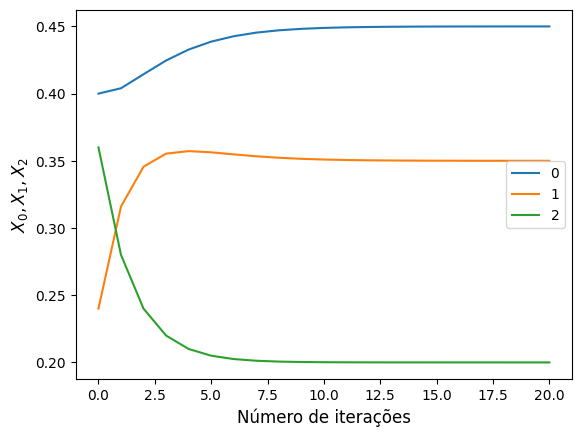

In [38]:
A = np.array([[0.8, 0.1, 0.1],
              [0.2, 0.7, 0.1],
              [0.1, 0.3, 0.6]])
state=np.array([[0.4, 0.24, 0.36]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
plt.figure()
for x in range(20):
  state=np.dot(state,A)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
dfDistrHist.plot()
#Item 1
value_500 = 500*dfDistrHist.iloc[0]
print('1. O número de pessoas que irão aos locais 0,1,2 serão:',value_500)
#Item 2
print('Item 2')
plt.xlabel('Número de iterações', fontsize = 12)
plt.ylabel('$X_0,X_1, X_2$', fontsize = 12)
plt.legend()
plt.show()

In [39]:
# Faremos um sistema linear para resolver com np.linalg.solve
#Para isso precisamos unir todas as equações conforme explicado no texto
A2 = np.append(A.T-np.identity(3),[[1,1,1]],axis=0)
b = (np.array([0,0,0,1])).T
#matriz deixa de ser quadrada usar teorema de Rouché-Capelli
xbar = np.linalg.solve(A2.T.dot(A2), A2.T.dot(b))
#Item 3
print('3. A distribuição estável é dada por:',xbar)
#Item 4
Abar = np.array([xbar,xbar,xbar])
print('4. A matriz de transformação estável é dada por:',Abar)
#Item 5
#Estado inicial 1:
print('5. Independente do estado inicial, o estado estacionário é o mesmo:')
print(state.dot(Abar))
state2=np.array([[0.1, 0.5, 0.4]])
print(state2.dot(Abar))
state3=np.array([[0.3, 0.5, 0.2]])
print(state2.dot(Abar))

3. A distribuição estável é dada por: [0.45 0.35 0.2 ]
4. A matriz de transformação estável é dada por: [[0.45 0.35 0.2 ]
 [0.45 0.35 0.2 ]
 [0.45 0.35 0.2 ]]
5. Independente do estado inicial, o estado estacionário é o mesmo:
[[0.45 0.35 0.2 ]]
[[0.45 0.35 0.2 ]]
[[0.45 0.35 0.2 ]]


### Exemplo da Loja de Doces
Temos duas lojas de doces, $A$ e $B$. Sabe-se,a través de pesquisas, que $30\%$ dos clientes da loja $A$ vão para loja $B$ todo mês, e $20\%$ dos clientes da loja $B$ vão para loja $A$ todo mês. Qual a matriz de distribuição estabilizada $\bar{\mathbf{A}}$ e, supondo que tenhamos 200 clientes ao total, como se distribuirão no estado estacionário?

In [41]:
 # Matriz de transição
A = np.array([[0.7, 0.3],
              [0.2, 0.8]])

# Montando o sistema de equações para encontrar o estado estável
# (A.T - I)x = 0 e sum(x) = 1
A2 = np.append(A.T - np.identity(2), [[1, 1]], axis=0)
b = np.array([0, 0, 1]).T

# Resolvendo o sistema Ax=b com a transformação A.T*A*x = A.T*b
sbar = np.linalg.solve(A2.T.dot(A2), A2.T.dot(b))

print('A distribuição estável é dada por:', sbar)


A distribuição estável é dada por: [0.4 0.6]


In [42]:
#Resposta:
A = np.array([[0.7,0.3],[0.2,0.8]])
A2 = np.append(A.T-np.identity(2),[[1,1]],axis=0)
b = (np.array([0,0,1])).T
xbar = np.linalg.solve(A2.T.dot(A2), A2.T.dot(b))
print('A distribuição estável é dada por:',xbar)
Abar = np.array([xbar,xbar,xbar])
print('A matriz de transformação estável é dada por:',Abar)
print('Para 200 clientes ao total, tem-se a seguinte distribuição nas lojas A e B, respectivamente,'
       ,int(round(xbar[0]*200)),'e',int(round(xbar[1]*200)))

A distribuição estável é dada por: [0.4 0.6]
A matriz de transformação estável é dada por: [[0.4 0.6]
 [0.4 0.6]
 [0.4 0.6]]
Para 200 clientes ao total, tem-se a seguinte distribuição nas lojas A e B, respectivamente, 80 e 120


### Exemplo de análise de lealdade à marca
Três marcas $A,B,C$ foram analisadas e verificou-se que:


*   Na marca $A$: $10\%$ dos clientes se movem para $B$ e $10\%$ se movem para $C$
*   Na marca $B$: $20\%$ dos clientes se movem para $A$ e $20\%$ se movem para $C$
*   Na marca $C$: $10\%$ dos clientes se movem para $A$ e $20\%$ se movem para $B$

Encontre a matriz de distribuição estabilizada e o vetor de estabilização.



In [43]:
# Definindo a matriz de transição
A = np.array([[0.8, 0.1, 0.1],
              [0.2, 0.6, 0.2],
              [0.1, 0.2, 0.7]])

# Montando o sistema de equações para encontrar o estado estável
# O sistema é (A.T - I)x = 0, com a restrição adicional de que a soma dos elementos de x é 1.
A_system = np.append(A.T - np.identity(3), [[1, 1, 1]], axis=0)
b = np.array([0, 0, 0, 1]).T

# Resolvendo o sistema. Como a matriz não é quadrada, usamos o método dos mínimos quadrados.
sbar = np.linalg.solve(A_system.T.dot(A_system), A_system.T.dot(b))

print('O vetor de estabilização é:')
print(sbar)

O vetor de estabilização é:
[0.42105263 0.26315789 0.31578947]


### Cadeias de Markov com estados absorventes
Um estado da cadeia de Markov é chamado de *estado absorvente* se $a_{ii} = 1 $ e, por consequência, qualquer valor da linha $i$, $a_{ij}, i \neq j$, vale $0$. Uma cadeia de Markov é dita absorvente se existe ao menos um estado absorvente, ou se for possível, a partir de qualquer estado, atingir um estado absorvente, não necessariamente em um único passo.

Veja a figura abaixo. Veja que a matriz da figura é definida como:
\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.2 & 0.7 & 0.1 \\
0.3 & 0.1 & 0.6 \\
\end{bmatrix}
\end{equation}

Dessa forma,
\begin{equation}
\mathbf{A}^2 = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.37 & 0.50 & 0.13 \\
0.50 & 0.13 & 0.37 \\
\end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{A}^3 = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.509 & 0.363 & 0.128 \\
0.637 & 0.128 & 0.235 \\
\end{bmatrix}
\end{equation}

Se formos adiante, perceberemos que a primeira coluna os valores crescem, se aproximando de 1, a primeira linha se mantém constante, e os demais valores estão indo para zero. Veja, por exemplo,

\begin{equation}
\mathbf{A}^5 = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.707 & 0.198 & 0.095 \\
0.802 & 0.095 & 0.103 \\
\end{bmatrix}
\end{equation}

Eventualmente, o estado estacionário leva a:
\begin{equation}
\bar{\mathbf{A}} = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation}
isto é,
\begin{equation}
\bar{s} = \begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
\end{equation}

Isto é, o estado $\mathbf{\mathcal{\bar P}} $ absorve todo o universo analisado.

Foi usada a palavra *eventualmente* no texto acima. Veja o exemplo de um estudo realizado pela Universidade da Carolina do Norte em pacientes de um determinado hospital. O problema foi modelado por uma cadeia de Markov: $0$ (morto), $1$ (estado desfavorável), $2 $(estado favorável). A matriz de transição tem um ciclo de 72 horas,

\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.085 & 0.779 & 0.136 \\
0.017 & 0.017 & 0.966 \\
\end{bmatrix}
\end{equation}

Perceba que $a_{11} = 1$, ou seja, $a_1$ é um estado de absorção, uma vez que o paciente morto, a cada passo ele continuará morto. Os estados $2$ e $3$ são
os estados de transição, e a partir de qualquer um destes é possível chegar no estado de absorção. Daí, a cadeia é absorvente. Porém, não é sensato acreditar que todos os pacientes acabarão mortos. Então, a matriz de transformação estabilizada é diferente daquela mostrada anteriormente.

Um [estudo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1828134/) realizado pela universidade de medicina do Texas em pacientes em UTI de um determinado hospital foi modelado por uma cadeia de Markov, com 8 estados possíveis após o primeiro dia de internação na unidade de terapia intensiva foram avaliados para cada paciente de UTI: enfermaria do mesmo hospital (W); Enfermaria de outro hospital, não UTI ou estar em outro hospital após a alta da UTI para outro hospital (B); UTI de outro hospital (O); Unidade de alta dependência ou área de atendimento intermediário mesmo hospital (U); mesma UTI ou outra UTI dentro do mesmo hospital (I); outro local mesmo hospital (H), saída (E) e óbito (D). Cada destino identifica um estado na cadeia de Markov. **Leia o artigo e veja uma aplicação clara do modelo.**

#### Exercício

Para as duas matrizes abaixo,

\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 &  0.0 & 0.0 \\
0.0 & 1.0 &  0.0 & 0.0 \\
0.2 & 0.2 &  0.5 & 0.1 \\
0.3 & 0.1 &  0.2 & 0.4 \\
\end{bmatrix}
\end{equation}


\begin{equation}
\mathbf{A} = \begin{bmatrix}
1.0 & 0.0 & 0.0 \\
0.4 & 0.3 & 0.3 \\
0.3 & 0.2 & 0.5 \\
\end{bmatrix}
\end{equation}

1.   Encontre a matriz estabilizada de transição de estado;
2.   Use diferentes valores de $\mathbf{S}_0$ e verifique os valores encontrados. Qual sua conclusão?

### Markov oculto


#### <font color='green'>Seu trabalho </font>

<center><img src='https://drive.google.com/uc?export=view&id=1r_BcKlp6AVj46yeQlT9fNxZY1qeajrH_' width="200"></center>

<font color='green'>
A aula de hoje, apesar de complexa, foi apenas uma introdução aos modelos de Markov, que serão muito úteis em nossas próximas etapas. Na lição de casa, você resolverá um problema mais elaborado, com até 3 colegas. A nota desta lição, substituirá sua menor nota.
</font>

<font color='green'>
Suponha que alguém lance uma moeda dez vezes e forneça o resultado:. Porém, o lançador tem duas moedas e muda aleatoriamente de uma moeda para outra. Uma moeda é equilibrada $E$ e a outra é tendenciosa $NE$, que resulta em cara 80% das vezes que é lançada. Após cada lançamento, o jogador pode manter a mesma moeda (probabilidade 0,8), mudar para a outra moeda (0,20). Além disso, a probabilidade de começar com a moeda equilibrada é 0,8. Com essas informações,

1. Monte o problema e as matrizes;
2. Qual a probabilidade da sequência $CKKCCCCCKC$, onde $C$ é cara e $K$ é coroa, ocorrer?
3. Qual a sequência mais provável das moedas utilizadas?
4. Qual a probabilidade dessa sequência ocorrer cem vezes? Estude o fenômeno de underflow e proponha a solução.

</font>

In [47]:
import numpy as np
import math


# 1. MONTAGEM DO PROBLEMA E DAS MATRIZES


print("="*60)
print("1. PARÂMETROS DO MODELO OCULTO DE MARKOV (HMM)")
print("="*60)

# A sequência de observações (C: Cara, K: Coroa)
observed_sequence = ['C', 'K', 'K', 'C', 'C', 'C', 'C', 'C', 'K', 'C']

# Os estados ocultos do sistema (as moedas)
states = ('E', 'NE') # E: Equilibrada, NE: Não Equilibrada

# O dicionário de probabilidades iniciais (vetor pi)
start_probability = {'E': 0.8, 'NE': 0.2}

# A matriz de transição de estados (matriz A)
# Representa a probabilidade de mudar de um estado para outro
transition_probability = {
    'E':  {'E': 0.8, 'NE': 0.2},
    'NE': {'E': 0.2, 'NE': 0.8},
}

# A matriz de emissão/observação (matriz B)
# Representa a probabilidade de uma observação ser gerada por um estado
emission_probability = {
    'E':  {'C': 0.5, 'K': 0.5},
    'NE': {'C': 0.8, 'K': 0.2},
}

print(f"Sequência de Observações: {observed_sequence}\n")
print(f"Estados Ocultos: {states}\n")
print(f"Probabilidades Iniciais (pi): {start_probability}\n")
print(f"Matriz de Transição (A):")
for state, transitions in transition_probability.items():
    print(f"  De {state}: {transitions}")
print("\nMatriz de Emissão (B):")
for state, emissions in emission_probability.items():
    print(f"  De {state}: {emissions}")
print("-" * 60 + "\n")


# 2. PROBABILIDADE DA SEQUÊNCIA (ALGORITMO FORWARD)


def forward_algorithm(obs_seq, states, start_p, trans_p, emit_p):
    """
    Calcula a probabilidade de uma sequência de observações usando o Algoritmo Forward.
    """
    # Usamos um dicionário para armazenar as probabilidades forward
    forward_probs = {}

    # Passo 1: Inicialização (t=0)
    # Calcula a probabilidade da primeira observação para cada estado.
    first_obs = obs_seq[0]
    for state in states:
        forward_probs[state] = start_p[state] * emit_p[state][first_obs]

    # Passo 2: Recorrência (t=1 até N-1)
    # Para cada passo no tempo, calcula a prob. de chegar em cada estado.
    for i in range(1, len(obs_seq)):
        obs = obs_seq[i]
        new_forward_probs = {}
        for current_state in states:
            # Soma das probabilidades de transição dos estados anteriores
            prob_sum = 0
            for prev_state in states:
                prob_sum += forward_probs[prev_state] * trans_p[prev_state][current_state]

            # Multiplica pela probabilidade de emissão da observação atual
            new_forward_probs[current_state] = prob_sum * emit_p[current_state][obs]
        forward_probs = new_forward_probs

    # Passo 3: Terminação
    # A probabilidade total da sequência é a soma das probabilidades no último passo.
    # **CORREÇÃO APLICADA AQUI:** Usando np.sum para evitar conflito com a função nativa sum().
    total_prob = np.sum(list(forward_probs.values()))

    return total_prob

print("="*60)
print("2. PROBABILIDADE DA SEQUÊNCIA (ALGORITMO FORWARD)")
print("="*60)

total_probability = forward_algorithm(
    observed_sequence,
    states,
    start_probability,
    transition_probability,
    emission_probability
)
print(f"A probabilidade da sequência {observed_sequence} ocorrer é:")
print(f"P(Sequência) ≈ {total_probability:.10f}")
print(f"Em notação científica: {total_probability:.4e}\n")


# 3. SEQUÊNCIA MAIS PROVÁVEL DE MOEDAS (ALGORITMO DE VITERBI)


def viterbi_algorithm(obs_seq, states, start_p, trans_p, emit_p):
    """
    Encontra a sequência de estados mais provável usando o Algoritmo de Viterbi.
    """
    # V: Armazena a probabilidade do caminho mais provável até o tempo t
    V = [{}]
    # path: Armazena o caminho (backpointers)
    path = {}

    # Passo 1: Inicialização (t=0)
    first_obs = obs_seq[0]
    for state in states:
        V[0][state] = start_p[state] * emit_p[state][first_obs]
        path[state] = [state]

    # Passo 2: Recorrência (t=1 até N-1)
    for t in range(1, len(obs_seq)):
        V.append({})
        new_path = {}
        obs = obs_seq[t]

        for current_state in states:
            # Encontra a probabilidade e o estado que maximizam a chance de chegar ao estado atual
            max_prob = -1
            best_prev_state = None
            for prev_state in states:
                prob = V[t-1][prev_state] * trans_p[prev_state][current_state]
                if prob > max_prob:
                    max_prob = prob
                    best_prev_state = prev_state

            # Multiplica pela prob. de emissão e armazena o caminho
            max_prob *= emit_p[current_state][obs]
            V[t][current_state] = max_prob
            new_path[current_state] = path[best_prev_state] + [current_state]

        path = new_path

    # Passo 3: Terminação e Backtracking
    # Encontra o estado final do caminho mais provável
    max_prob = -1
    best_path_end_state = None
    last_step = len(obs_seq) - 1
    for state in states:
        if V[last_step][state] > max_prob:
            max_prob = V[last_step][state]
            best_path_end_state = state

    most_probable_sequence = path[best_path_end_state]

    return max_prob, most_probable_sequence

print("="*60)
print("3. SEQUÊNCIA MAIS PROVÁVEL DE MOEDAS (ALGORITMO DE VITERBI)")
print("="*60)

prob_path, seq_path = viterbi_algorithm(
    observed_sequence,
    states,
    start_probability,
    transition_probability,
    emission_probability
)
print(f"A sequência de moedas mais provável é:")
print(f"Caminho: {' → '.join(seq_path)}")
print(f"Probabilidade deste caminho: {prob_path:.4e}\n")



# 4. FENÔMENO DE UNDERFLOW E SOLUÇÃO COM LOGARITMOS

print("="*60)
print("4. FENÔMENO DE UNDERFLOW E SOLUÇÃO COM LOGARITMOS")
print("="*60)

print("a) O Problema do Underflow:")
prob_100_times_standard = total_probability ** 100
print(f"Tentando calcular P(Sequência)^100 com ponto flutuante padrão:")
print(f"  ({total_probability:.4e})^100 = {prob_100_times_standard}")
print("O resultado é zero, pois o número é pequeno demais para ser representado.\n")

print("b) A Solução: Trabalhar com Logaritmos:")
print("Para evitar o underflow, convertemos as probabilidades para o espaço logarítmico.")
print("A multiplicação se torna soma: log(a*b) = log(a) + log(b).")
print("A soma se torna uma operação especial chamada LogSumExp: log(a+b) = log(e^log(a) + e^log(b)).\n")

# Re-implementando Viterbi com logaritmos
def viterbi_log_algorithm(obs_seq, states, start_p, trans_p, emit_p):
    """
    Algoritmo de Viterbi no espaço logarítmico para evitar underflow.
    """
    # Converte as probabilidades para log-probabilidades
    # Adicionamos um valor muito pequeno para evitar log(0) = -inf
    epsilon = 1e-100
    log_start_p = {state: math.log(p + epsilon) for state, p in start_p.items()}
    log_trans_p = {s_from: {s_to: math.log(p + epsilon) for s_to, p in ps.items()} for s_from, ps in trans_p.items()}
    log_emit_p = {state: {obs: math.log(p + epsilon) for obs, p in ps.items()} for state, ps in emit_p.items()}

    V = [{}]
    path = {}

    first_obs = obs_seq[0]
    for state in states:
        V[0][state] = log_start_p[state] + log_emit_p[state][first_obs]
        path[state] = [state]

    for t in range(1, len(obs_seq)):
        V.append({})
        new_path = {}
        obs = obs_seq[t]

        for current_state in states:
            max_log_prob = -float('inf')
            best_prev_state = None
            for prev_state in states:
                # Soma no espaço logarítmico
                log_prob = V[t-1][prev_state] + log_trans_p[prev_state][current_state]
                if log_prob > max_log_prob:
                    max_log_prob = log_prob
                    best_prev_state = prev_state

            V[t][current_state] = max_log_prob + log_emit_p[current_state][obs]
            new_path[current_state] = path[best_prev_state] + [current_state]

        path = new_path

    max_log_prob = -float('inf')
    best_path_end_state = None
    last_step = len(obs_seq) - 1
    for state in states:
        if V[last_step][state] > max_log_prob:
            max_log_prob = V[last_step][state]
            best_path_end_state = state

    return max_log_prob, path[best_path_end_state]

log_prob_path, log_seq_path = viterbi_log_algorithm(
    observed_sequence,
    states,
    start_probability,
    transition_probability,
    emission_probability
)

print("c) Aplicando a Solução:")
print("A sequência mais provável encontrada com o Viterbi em log-space é a mesma:")
print(f"  Caminho: {' → '.join(log_seq_path)}\n")
print("Agora podemos calcular a log-probabilidade de 100 repetições:")
log_prob_100_times = log_prob_path * 100
print(f"Log-Probabilidade do caminho mais provável: {log_prob_path:.4f}")
print(f"Log-Probabilidade de 100 repetições: {log_prob_100_times:.4f}")
print("\nEste valor é um número negativo normal, evitando o underflow.")
print("Para ter uma ideia da magnitude, podemos tentar converter de volta:")
print(f"P(Caminho)^100 = e^({log_prob_100_times:.2f})")
print("Este é um número imensamente pequeno, mas que pode ser manipulado em sua forma logarítmica.")
print("="*60)

1. PARÂMETROS DO MODELO OCULTO DE MARKOV (HMM)
Sequência de Observações: ['C', 'K', 'K', 'C', 'C', 'C', 'C', 'C', 'K', 'C']

Estados Ocultos: ('E', 'NE')

Probabilidades Iniciais (pi): {'E': 0.8, 'NE': 0.2}

Matriz de Transição (A):
  De E: {'E': 0.8, 'NE': 0.2}
  De NE: {'E': 0.2, 'NE': 0.8}

Matriz de Emissão (B):
  De E: {'C': 0.5, 'K': 0.5}
  De NE: {'C': 0.8, 'K': 0.2}
------------------------------------------------------------

2. PROBABILIDADE DA SEQUÊNCIA (ALGORITMO FORWARD)
A probabilidade da sequência ['C', 'K', 'K', 'C', 'C', 'C', 'C', 'C', 'K', 'C'] ocorrer é:
P(Sequência) ≈ 0.0019711164
Em notação científica: 1.9711e-03

3. SEQUÊNCIA MAIS PROVÁVEL DE MOEDAS (ALGORITMO DE VITERBI)
A sequência de moedas mais provável é:
Caminho: E → E → E → NE → NE → NE → NE → NE → NE → NE
Probabilidade deste caminho: 1.7592e-04

4. FENÔMENO DE UNDERFLOW E SOLUÇÃO COM LOGARITMOS
a) O Problema do Underflow:
Tentando calcular P(Sequência)^100 com ponto flutuante padrão:
  (1.9711e-03)^100 = 2